In [1]:
from sqlalchemy.orm import relationship, sessionmaker
from sqlalchemy import create_engine
from database import Reactions

engine = create_engine('sqlite:///reactions2.db', echo = False)

Session = sessionmaker(bind=engine)
session = Session()

2022-12-15 17:53:00,607 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-12-15 17:53:00,608 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("reactions")
2022-12-15 17:53:00,608 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-12-15 17:53:00,609 INFO sqlalchemy.engine.Engine COMMIT


In [2]:
def getRxnFP(r, fp_type, summed, multipliers):
    if fp_type == "MACCS":
        rxnMatrix = np.zeros((5,167))
    else:
        rxnMatrix = np.zeros((5,2048))
    row = 0
    for k,m in zip(reagent_classes,multipliers):
        sm = getattr(r,k)
        if sm == "NONE":
            fp = np.zeros((1,))
        else:
            if k == "solvent":
                mol = Chem.MolFromSmiles(solv_map[sm])
                if fp_type == "MACCS":
                    DataStructs.ConvertToNumpyArray(MACCSkeys.GenMACCSKeys(mol), fp)
                else:
                    DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, 4), fp)
                if "%" in sm:
                    s2 = sm.split("_")[1]
                    mol2 = Chem.MolFromSmiles(solv_map[s2])
                    fp2 = np.zeros((1,))
                    if fp_type == "MACCS":
                        DataStructs.ConvertToNumpyArray(MACCSkeys.GenMACCSKeys(mol), fp2)
                    else:
                        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, 4), fp2)

                    fp = np.add(fp,fp2)
            else:
                mol = Chem.MolFromSmiles(sm)
                fp = np.zeros((1,))
                if fp_type == "MACCS":
                    DataStructs.ConvertToNumpyArray(MACCSkeys.GenMACCSKeys(mol), fp)
                else:
                    DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, 4), fp)
        fp = fp*m
        rxnMatrix[row,:] = fp
        row = row + 1
    if summed:
        return np.sum(rxnMatrix, axis=0)
    else:
        return rxnMatrix

In [3]:
r = session.query(Reactions).all()


/var/folders/8k/w__0g4xs7rj0xv7hk3dqm71w0000gn/T/ipykernel_9915/3822804417.py:1: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  r = session.query(Reactions).all()


In [168]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MACCSkeys
import pandas as pd

reagent_classes = ["electrophile", "nucleophile", "catalyst_smiles", "base_smiles", "solvent"]
solv_map = {"NMP":'O=C1N(C)CCC1', "DMSO":'O=S(C)C',"DMF":'O=CN(C)C', \
            "25%H2O_NMP":'[H]O[H].O=C1N(C)CCC1', "25%H2O_DMSO":'O=S(C)C.[H]O[H]', "25%H2O_DMF":'O=CN(C)C.[H]O[H]', \
            "25%tAmOH_DMSO":"CCC(C)(O)C.O=S(C)C","10%tAmOH_NMP":"CCC(C)(O)C.O=C1N(C)CCC1"}

class_reagents = {k:[] for k in reagent_classes}
multipliers = [1, 1, 5, 1, 1]
yields = []
index_split_by_class = {k:[] for k in reagent_classes}
rxnfps = []
yield_group = []
for k in r:
    if "Suzuki" not in k.reaction_name:
        continue
    print(k.reaction_name)
    if k.output_value > 100:
        continue
    for j in reagent_classes:
        if j=="solvent":
            mol=Chem.MolFromSmiles(solv_map[getattr(k,j)])
            sm = solv_map[getattr(k,j)]
        else:
            mol = Chem.MolFromSmiles(getattr(k,j))
            sm = getattr(k,j)
        if sm not in class_reagents[j]:
            class_reagents[j].append(sm)

        index_split_by_class[j].append(class_reagents[j].index(sm))
    n = k.group
    if k.output_value == 0:
        yield_group.append(0)
    elif k.output_value < 33:
        yield_group.append(1)
    elif k.output_value < 66:
        yield_group.append(2)
    else:
        yield_group.append(3)

    yields.append(float(k.output_value))
    fp = getRxnFP(k, "MFP4", True, multipliers)
    rxnfps.append(fp)

Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boroni

(array([2019.,  140.,  106.,   53.,   46.,   50.,   41.,   36.,   35.,
          43.]),
 array([ -1.3 ,   8.83,  18.96,  29.09,  39.22,  49.35,  59.48,  69.61,
         79.74,  89.87, 100.  ]),
 <BarContainer object of 10 artists>)

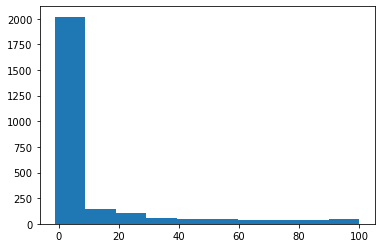

In [169]:
plt.hist(yields)

In [170]:
print(len(index_split_by_class["electrophile"]), len(X_TSNE_RFP), len(rxnfps))

2569 1743 2569


In [171]:
for k in class_reagents:
    print(k, len(class_reagents[k]))

electrophile 15
nucleophile 34
catalyst_smiles 18
base_smiles 8
solvent 8


In [175]:
from sklearn.manifold import TSNE

X_TSNE_RFP = TSNE(n_components=2, n_jobs=-1, random_state=1, perplexity=20).fit_transform(rxnfps)


/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


20
2
18
48.58840579710146
CC(C)Oc1cccc(OC(C)C)c1c2ccccc2P(C3CCCCC3)C4CCCCC4.O=S(O[Pd]c5ccccc5c6ccccc6N)(C)=O


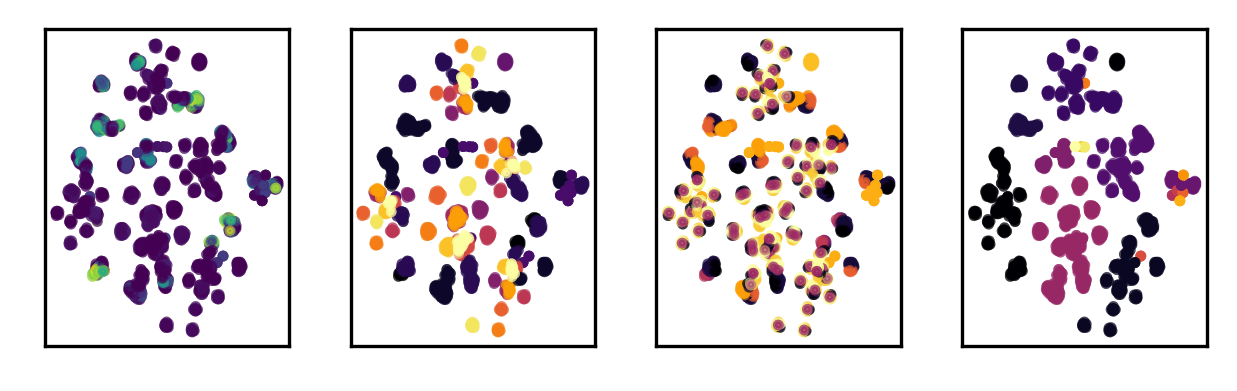

In [201]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(5,1.4), dpi=300)
ax[0].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='viridis', c=yields, alpha=.5, marker='.',s=10, vmax=100, vmin = 0)
ax[0].set_xticks([])
ax[0].set_yticks([])
# ax[0][0].set_title("PROD/IS", fontfamily="arial", fontsize=6)
# ax[0][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[0][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[1].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["electrophile"], alpha=.5, marker='.',s=10)
ax[1].set_xticks([])
ax[1].set_yticks([])
# ax[0][1].set_title("Electrophile", fontfamily="arial", fontsize=6)
# ax[0][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[0][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[2].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["nucleophile"], alpha=.5, marker='.',s=10)
ax[2].set_xticks([])
ax[2].set_yticks([])
# ax[1][0].set_title("Nucleophile", fontfamily="arial", fontsize=6)
# ax[1][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[1][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[3].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["catalyst_smiles"], alpha=.5, marker='.',s=10)
ax[3].set_xticks([])
ax[3].set_yticks([])
# ax[1][1].set_title("Catalyst", fontfamily="arial", fontsize=6)
# ax[1][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[1][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)
pairs = []
eles = []
nucs = []
avg_yields=[]
for i,k in enumerate(X_TSNE_RFP):
    if k[0] < -30:
        if k[1] < -38:
            # ax[3].scatter(k[0],k[1], c="red", s=5, marker="x")
            eles.append(index_split_by_class["electrophile"][i])
            nucs.append(index_split_by_class["nucleophile"][i])
            pairs.append((index_split_by_class["electrophile"][i], index_split_by_class["nucleophile"][i]))
            avg_yields.append(yields[i])
print(len(set(pairs)))
print(len(set(eles)))
print(len(set(nucs)))
print(np.mean(avg_yields))
print(class_reagents["catalyst_smiles"][index_split_by_class["catalyst_smiles"][i]])

# ax[2][0].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["base_smiles"], alpha=.5, marker='.',s=10)
# ax[2][0].set_xticks([])
# ax[2][0].set_yticks([])
# # ax[2][0].set_title("Base", fontfamily="arial", fontsize=6)
# # ax[2][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# # ax[2][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)


# ax[2][1].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["solvent"], alpha=.5, marker='.',s=10)
# ax[2][1].set_xticks([])
# ax[2][1].set_yticks([])
# ax[2][1].set_title("Solvent", fontfamily="arial", fontsize=6)
# ax[2][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[2][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)


# plt.tight_layout()
plt.subplots_adjust(wspace=.25, hspace=.25)

plt.savefig('si6.png', dpi=300, bbox_inches='tight',pad_inches=0.01)

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MACCSkeys
import pandas as pd

reagent_classes = ["electrophile", "nucleophile", "catalyst_smiles", "base_smiles", "solvent"]
solv_map = {"NMP":'O=C1N(C)CCC1', "DMSO":'O=S(C)C',"DMF":'O=CN(C)C', \
            "25%H2O_NMP":'[H]O[H].O=C1N(C)CCC1', "25%H2O_DMSO":'O=S(C)C.[H]O[H]', "25%H2O_DMF":'O=CN(C)C.[H]O[H]', \
            "25%tAmOH_DMSO":"CCC(C)(O)C.O=S(C)C","10%tAmOH_NMP":"CCC(C)(O)C.O=C1N(C)CCC1"}

multipliers = [1, 1, 1, 1, 1]
rxnfps = []
yields = []
data = {k:[] for k in reagent_classes}
smiles_to_name = {}
smiles_to_yields = {}
true_yields = []
yields_split_by_class = {k:{} for k in reagent_classes}
fps_split_by_class = {k:[] for k in reagent_classes}
index_split_by_class = {k:[] for k in reagent_classes}

ordered_smiles_by_class = {k:{} for k in reagent_classes}
remove_outlier_fp = []
for k in r:
    if "Suzuki" not in k.reaction_name:
        continue
    fp = getRxnFP(k, "MFP4", True, multipliers)
    rxnfps.append(fp)
    if float(k.output_value) <= 100:
        remove_outlier_fp.append(fp)
    true_yields.append(float(k.output_value))
    n = k.group
    if n == "0":
        yields.append(0)
    elif n == "low":
        yields.append(1)
    elif n == "med":
        yields.append(2)
    else:
        yields.append(3)
        

    for i,j in enumerate(reagent_classes):
        data[j].append(getattr(k,j))
        if j == "catalyst_smiles":
            smiles_to_name[getattr(k,j)] = k.catalyst
            if getattr(k,j) not in smiles_to_yields:
                smiles_to_yields[getattr(k,j)] = []
            smiles_to_yields[getattr(k,j)].append(k.output_value)
        if j == "base_smiles":
            smiles_to_name[getattr(k,j)] = k.base
        
        if float(k.output_value) > 100:
            continue
            

        if j=="solvent":
            mol=Chem.MolFromSmiles(solv_map[getattr(k,j)])
            sm = solv_map[getattr(k,j)]
        else:
            mol = Chem.MolFromSmiles(getattr(k,j))
            sm = getattr(k,j)

        if sm not in ordered_smiles_by_class[j]:
            fp = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, 4), fp)

            ordered_smiles_by_class[j][sm]= fp
            
        if sm not in yields_split_by_class[j]:
            yields_split_by_class[j][sm] = []

        yields_split_by_class[j][sm].append(float(k.output_value))

print(len(rxnfps), len(yields))

2786 2786


In [202]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MACCSkeys
import pandas as pd

reagent_classes = ["electrophile", "nucleophile", "catalyst_smiles", "base_smiles", "solvent"]
solv_map = {"NMP":'O=C1N(C)CCC1', "DMSO":'O=S(C)C',"DMF":'O=CN(C)C', \
            "25%H2O_NMP":'[H]O[H].O=C1N(C)CCC1', "25%H2O_DMSO":'O=S(C)C.[H]O[H]', "25%H2O_DMF":'O=CN(C)C.[H]O[H]', \
            "25%tAmOH_DMSO":"CCC(C)(O)C.O=S(C)C","10%tAmOH_NMP":"CCC(C)(O)C.O=C1N(C)CCC1"}

class_reagents = {k:[] for k in reagent_classes}
multipliers = [1, 1, 1, 5, 1]
yields = []
index_split_by_class = {k:[] for k in reagent_classes}
rxnfps = []
yield_group = []
for k in r:
    if "Suzuki" not in k.reaction_name:
        continue
    print(k.reaction_name)
    if k.output_value > 100:
        continue
    for j in reagent_classes:
        if j=="solvent":
            mol=Chem.MolFromSmiles(solv_map[getattr(k,j)])
            sm = solv_map[getattr(k,j)]
        else:
            mol = Chem.MolFromSmiles(getattr(k,j))
            sm = getattr(k,j)
        if sm not in class_reagents[j]:
            class_reagents[j].append(sm)

        index_split_by_class[j].append(class_reagents[j].index(sm))
    n = k.group
    if k.output_value == 0:
        yield_group.append(0)
    elif k.output_value < 33:
        yield_group.append(1)
    elif k.output_value < 66:
        yield_group.append(2)
    else:
        yield_group.append(3)

    yields.append(float(k.output_value))
    fp = getRxnFP(k, "MFP4", True, multipliers)
    rxnfps.append(fp)

Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boroni

In [204]:
from sklearn.manifold import TSNE

X_TSNE_RFP = TSNE(n_components=2, n_jobs=-1, random_state=1, perplexity=20).fit_transform(rxnfps)


/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


19
1
19
18.370107767611703
CN(C)C(N(C)C)=NC(C)(C)C


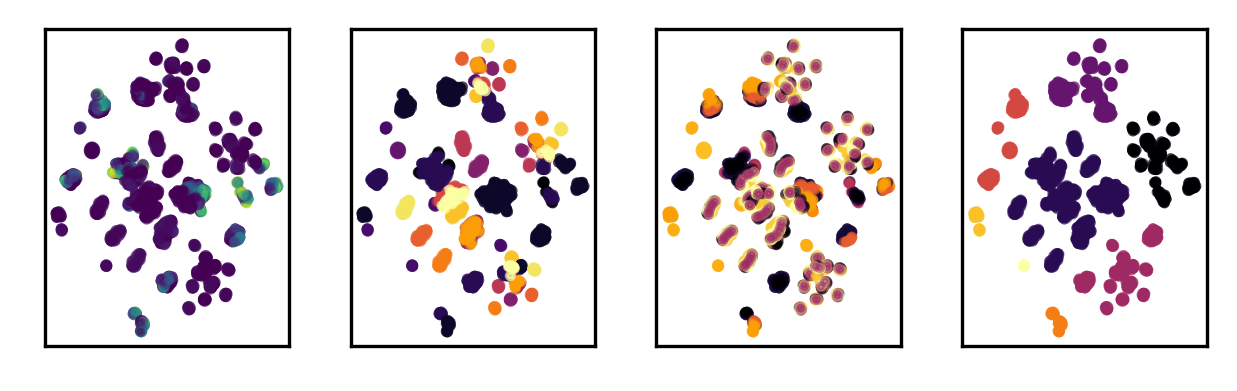

In [217]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(5,1.4), dpi=300)
ax[0].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='viridis', c=yields, alpha=.5, marker='.',s=10, vmax=100, vmin = 0)
ax[0].set_xticks([])
ax[0].set_yticks([])
# ax[0][0].set_title("PROD/IS", fontfamily="arial", fontsize=6)
# ax[0][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[0][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[1].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["electrophile"], alpha=.5, marker='.',s=10)
ax[1].set_xticks([])
ax[1].set_yticks([])
# ax[0][1].set_title("Electrophile", fontfamily="arial", fontsize=6)
# ax[0][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[0][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[2].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["nucleophile"], alpha=.5, marker='.',s=10)
ax[2].set_xticks([])
ax[2].set_yticks([])
# ax[1][0].set_title("Nucleophile", fontfamily="arial", fontsize=6)
# ax[1][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[1][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[3].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["base_smiles"], alpha=.5, marker='.',s=10)
ax[3].set_xticks([])
ax[3].set_yticks([])
# ax[1][1].set_title("Catalyst", fontfamily="arial", fontsize=6)
# ax[1][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[1][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)
pairs = []
eles = []
nucs = []
avg_yields=[]
for i,k in enumerate(X_TSNE_RFP):
    if k[0] > 0 and k[0] < 30:
        if k[1] < 0 and k[1] > -15:
            # ax[3].scatter(k[0],k[1], c="red", s=5, marker="x")
            eles.append(index_split_by_class["electrophile"][i])
            nucs.append(index_split_by_class["nucleophile"][i])
            pairs.append((index_split_by_class["electrophile"][i], index_split_by_class["nucleophile"][i]))
            avg_yields.append(yields[i])
print(len(set(pairs)))
print(len(set(eles)))
print(len(set(nucs)))
print(np.mean(avg_yields))
print(class_reagents["base_smiles"][index_split_by_class["base_smiles"][i]])

# ax[2][0].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["base_smiles"], alpha=.5, marker='.',s=10)
# ax[2][0].set_xticks([])
# ax[2][0].set_yticks([])
# # ax[2][0].set_title("Base", fontfamily="arial", fontsize=6)
# # ax[2][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# # ax[2][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)


# ax[2][1].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["solvent"], alpha=.5, marker='.',s=10)
# ax[2][1].set_xticks([])
# ax[2][1].set_yticks([])
# ax[2][1].set_title("Solvent", fontfamily="arial", fontsize=6)
# ax[2][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[2][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)


# plt.tight_layout()
plt.subplots_adjust(wspace=.25, hspace=.25)

plt.savefig('si6b.png', dpi=300, bbox_inches='tight',pad_inches=0.01)

In [218]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MACCSkeys
import pandas as pd

reagent_classes = ["electrophile", "nucleophile", "catalyst_smiles", "base_smiles", "solvent"]
solv_map = {"NMP":'O=C1N(C)CCC1', "DMSO":'O=S(C)C',"DMF":'O=CN(C)C', \
            "25%H2O_NMP":'[H]O[H].O=C1N(C)CCC1', "25%H2O_DMSO":'O=S(C)C.[H]O[H]', "25%H2O_DMF":'O=CN(C)C.[H]O[H]', \
            "25%tAmOH_DMSO":"CCC(C)(O)C.O=S(C)C","10%tAmOH_NMP":"CCC(C)(O)C.O=C1N(C)CCC1"}

class_reagents = {k:[] for k in reagent_classes}
multipliers = [1, 1, 1, 1, 5]
yields = []
index_split_by_class = {k:[] for k in reagent_classes}
rxnfps = []
yield_group = []
for k in r:
    if "Suzuki" not in k.reaction_name:
        continue
    print(k.reaction_name)
    if k.output_value > 100:
        continue
    for j in reagent_classes:
        if j=="solvent":
            mol=Chem.MolFromSmiles(solv_map[getattr(k,j)])
            sm = solv_map[getattr(k,j)]
        else:
            mol = Chem.MolFromSmiles(getattr(k,j))
            sm = getattr(k,j)
        if sm not in class_reagents[j]:
            class_reagents[j].append(sm)

        index_split_by_class[j].append(class_reagents[j].index(sm))
    n = k.group
    if k.output_value == 0:
        yield_group.append(0)
    elif k.output_value < 33:
        yield_group.append(1)
    elif k.output_value < 66:
        yield_group.append(2)
    else:
        yield_group.append(3)

    yields.append(float(k.output_value))
    fp = getRxnFP(k, "MFP4", True, multipliers)
    rxnfps.append(fp)

Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boronic acids
Suzuki w/ boroni

In [219]:
from sklearn.manifold import TSNE

X_TSNE_RFP = TSNE(n_components=2, n_jobs=-1, random_state=1, perplexity=20).fit_transform(rxnfps)


/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


21
2
18
44.4374358974359
O=S(C)C.[H]O[H]


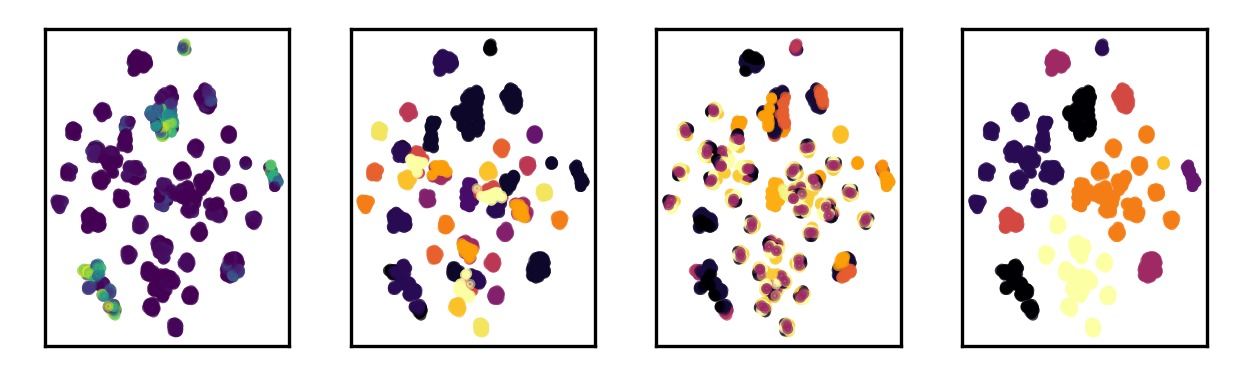

In [234]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(5,1.4), dpi=300)
ax[0].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='viridis', c=yields, alpha=.5, marker='.',s=10, vmax=100, vmin = 0)
ax[0].set_xticks([])
ax[0].set_yticks([])
# ax[0][0].set_title("PROD/IS", fontfamily="arial", fontsize=6)
# ax[0][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[0][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[1].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["electrophile"], alpha=.5, marker='.',s=10)
ax[1].set_xticks([])
ax[1].set_yticks([])
# ax[0][1].set_title("Electrophile", fontfamily="arial", fontsize=6)
# ax[0][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[0][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[2].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["nucleophile"], alpha=.5, marker='.',s=10)
ax[2].set_xticks([])
ax[2].set_yticks([])
# ax[1][0].set_title("Nucleophile", fontfamily="arial", fontsize=6)
# ax[1][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[1][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)

ax[3].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["solvent"], alpha=.5, marker='.',s=10)
ax[3].set_xticks([])
ax[3].set_yticks([])
# ax[1][1].set_title("Catalyst", fontfamily="arial", fontsize=6)
# ax[1][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[1][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)
pairs = []
eles = []
nucs = []
avg_yields=[]
for i,k in enumerate(X_TSNE_RFP):
    if k[0] > -100 and k[0] < -30:
        if k[1] < -20 and k[1] > -100:
            # ax[3].scatter(k[0],k[1], c="red", s=5, marker="x")
            eles.append(index_split_by_class["electrophile"][i])
            nucs.append(index_split_by_class["nucleophile"][i])
            pairs.append((index_split_by_class["electrophile"][i], index_split_by_class["nucleophile"][i]))
            avg_yields.append(yields[i])
print(len(set(pairs)))
print(len(set(eles)))
print(len(set(nucs)))
print(np.mean(avg_yields))
print(class_reagents["solvent"][index_split_by_class["solvent"][i]])

# ax[2][0].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["base_smiles"], alpha=.5, marker='.',s=10)
# ax[2][0].set_xticks([])
# ax[2][0].set_yticks([])
# # ax[2][0].set_title("Base", fontfamily="arial", fontsize=6)
# # ax[2][0].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# # ax[2][0].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)


# ax[2][1].scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='inferno', c=index_split_by_class["solvent"], alpha=.5, marker='.',s=10)
# ax[2][1].set_xticks([])
# ax[2][1].set_yticks([])
# ax[2][1].set_title("Solvent", fontfamily="arial", fontsize=6)
# ax[2][1].set_xlabel("tsne$_x$", fontweight="bold", fontfamily="arial", fontsize=6)
# ax[2][1].set_ylabel("tsne$_y$", fontweight="bold", fontfamily="arial", fontsize=6)


# plt.tight_layout()
plt.subplots_adjust(wspace=.25, hspace=.25)

plt.savefig('si6c.png', dpi=300, bbox_inches='tight',pad_inches=0.01)